### Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

### 6.1 Generate a random adjacency matrix for a simple undirected weighted graph of 100 vertices and 500 edges with assigned random positive integer weights (note that the matrix should be symmetric and contain only 0s and weights as elements). Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices. Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex and calculate the average time required for the paths search of each algorithm. Analyse the results obtained.

Adjacency matrix fragment:

 [[  0. 190.   0. ...   0.   0.   0.]
 [190.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]

Graph vizualization:


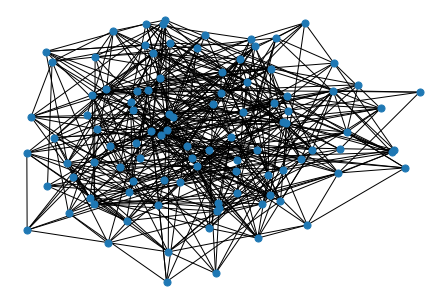

In [2]:
import random
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import perf_counter as time


def adj_matrix(nodes_num, connections_num):
    
    """ random generation of adjacency matrix for wheithed
    graph with fixed numbers of nodes and connections """
    
    matrix = np.zeros([nodes_num, nodes_num])
    counter = 0

    while counter < connections_num:

        i, j = random.sample([i for i in range(nodes_num)], 2)

        if matrix[i][j] == 0:

            matrix[i][j] = matrix[j][i] = random.randint(1, connections_num) 
            counter += 1
            
    return matrix


# Testing----------------------------

random.seed(21)
nodes_num, connections_num =  100, 500 #5, 10

adj_matrix = adj_matrix(nodes_num, connections_num)  
print('Adjacency matrix fragment:\n\n', adj_matrix)

print('\nGraph vizualization:')
graph = nx.Graph(adj_matrix)
nx.draw(graph, node_size = 50)

In [3]:
def Dijkstra(graph, start_node):
    
    """given a weighted graph (with positive weights) and a source vertex, find
    shortest paths from the source to all other vertices """
    
    res = []
    for stop_node in range(len(graph)):
        if stop_node != start_node:
            res.append(nx.dijkstra_path(graph, start_node, stop_node))
    
    return res


def Bellman_Ford(graph, start_node):
    
    """given a weighted graph (with positive weights) and a source vertex, find
    shortest paths from the source to all other vertices """

    res = []
    for stop_node in range(len(graph)):
        if stop_node != start_node:
            res.append(nx.bellman_ford_path(graph, start_node, stop_node))
    
    return res


# Testing-----------

node = random.randint(0, nodes_num - 1)
DA_time, BFA_time = [], []

for i in range(10):

    start_time = time() 
    Dijkstra(graph, node)
    stop_time = time()
    DA_time.append(stop_time - start_time)
    
    start_time = time() 
    Bellman_Ford(graph, node)
    stop_time = time()
    BFA_time.append(stop_time - start_time)


print("Average time of Dijkstra's search: {:f} sec\n".format(np.mean(DA_time)))
print("Average time of Bellman_Ford's search: {:f} sec".format(np.mean(BFA_time)))

Average time of Dijkstra's search: 0.053522 sec

Average time of Bellman_Ford's search: 0.246289 sec


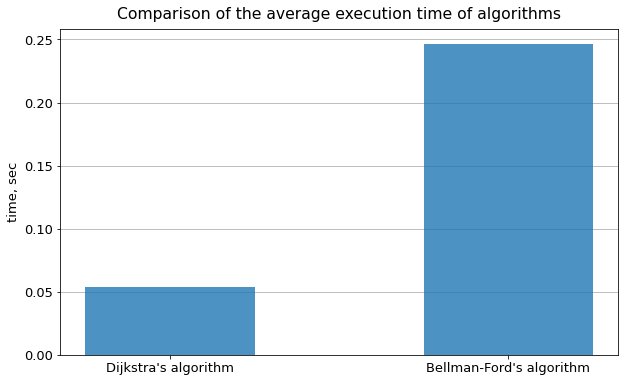

In [9]:
# Vizualization - comparison of the results

mpl.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (10, 6))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 2)
plt.title("Сomparison of the average execution time of algorithms", pad = 10)

xs = range(2)
plt.bar([x for x in xs], [np.mean(DA_time), np.mean(BFA_time)], \
        width = 0.5, alpha = 0.8, zorder = 2)

plt.xticks([i for i in xs], ["Dijkstra's algorithm", "Bellman-Ford's algorithm"])

plt.ylabel('time, sec')
plt.show()

-----------------------------------------------------------------------------------------------------------------------------
### 6.2 Generate a 10 x 20 cell grid with 40 obstacle cells. Choose two random non-obstacle cells and find a shortest path between them using A* algorithm. Repeat the experiment 5 times with different random pair of cells. Analyse the results obtained.

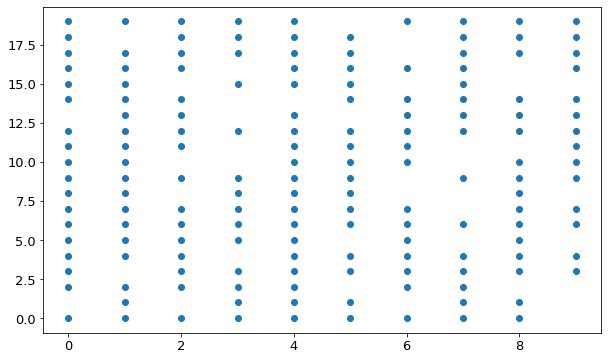

In [5]:
import random
import numpy as np
import networkx as nx
from time import perf_counter as time

# Data generation---------
random.seed(10)

n_rows = 10
n_colls = 20
n_obstacles = 40

grid = [[[i, j] for j in range(n_colls)] for i in range(n_rows)]
obstacles = []

counter = 0
while counter < n_obstacles:
    
    i, j = random.randint(0, n_rows - 1), random.randint(0, n_colls - 1)
    
    try:
        obstacles.append(grid[i][j])
        del grid[i][j]
        counter += 1
    except:
        pass

# Testing---------
x_arr, y_arr = [], []
for row in grid:
    for node in row:
        x_arr.append(node[0])
        y_arr.append(node[1])

fig = plt.figure(figsize = (10, 6))
plt.scatter(x_arr, y_arr)

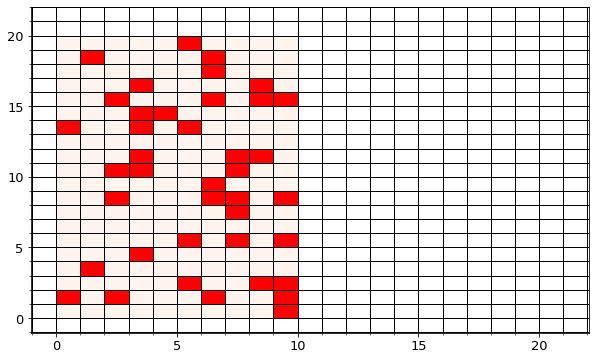

In [7]:
fig, ax = plt.subplots(figsize = [10, 6])

for row in grid:
    for x, y in row:
        ax.fill([x, x + 1, x + 1, x], [y, y, y + 1, y + 1], c = 'seashell')

for x, y in obstacles:
    ax.fill([x, x + 1, x + 1, x], [y, y, y + 1, y + 1], c = 'red')

#ax.plot([i for i in range(10)], [i for i in range(10)], c = 'k')
#fig.set_facecolor('floralwhite')
#ax.set_facecolor('seashell')

x, y = 20, 0
ax.fill([x, x + 1, x + 1, x], [y, y, y + 1, y + 1], c = 'white')

x, y = 0, 20
ax.fill([x, x + 1, x + 1, x], [y, y, y + 1, y + 1], c = 'white')

ax.minorticks_on()

ax.grid(color = 'black',
        linewidth = 1,
        linestyle = '-',
        which = 'major',) 

ax.grid(color = 'black',
        linewidth = 1,
        linestyle = '-',
        which = 'minor',) 


### Another way to realize:


Graph vizualization:


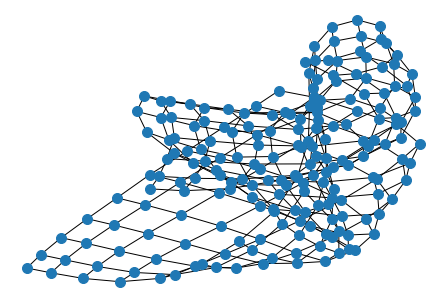


Graph with obstacles:


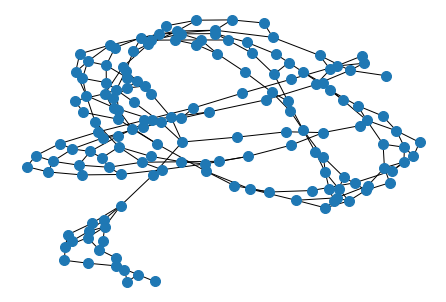

In [11]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from time import perf_counter as time

# Data generation---------
random.seed(10)

n_rows, n_colls, n_obstacles = 10, 20, 40
#n_rows, n_colls, n_obstacles = 3, 3, 2
n_nodes = n_rows * n_colls

### The node number is related to its indexes in the original grid
### as follows: (i, j) -> n(i, j) = i * n_colls + j
### and in the opposite direction: n -> i(n) = n // n_colls, j(n) = n % n_colls
### Thus, in the n(i, j)-th row, ones will stand only in places of type n(i +- 1, j +- 1)

adj_matrix = np.zeros([n_nodes, n_nodes])
for num in range(n_nodes):
    
    i, j =  num // n_colls, num % n_colls
    
    for tmp in [1, -1]:
        if 0 < j + tmp < n_colls:
            adj_matrix[num, i * n_colls + j + tmp] = adj_matrix[i * n_colls + j + tmp, num] = 1
        if 0 < i + tmp < n_rows:
            adj_matrix[num, (i + tmp) * n_colls + j] = adj_matrix[(i + tmp) * n_colls + j, num] = 1
        

print('\nGraph vizualization:')
graph = nx.Graph(adj_matrix)
nx.draw(graph, node_size = 100)
plt.show()

counter = 0
while counter < n_obstacles:
    
    num = random.randint(0, n_nodes - 1)
    
    try:
        graph.remove_node(num)
        counter += 1
    except:
        pass
    
print('\nGraph with obstacles:')
nx.draw(graph, node_size = 100)
plt.show()

In [14]:
random.seed(21)

AA_time = []
edges_list = []

for num in graph:
    edges_list.append(num)

DA_time, BFA_time = [], []
nodes_list = []

for i in range(5):
    
    start_node, stop_node = random.sample(edges_list, 2)
    nodes_list.append([start_node, stop_node])
    
    start_time = time()
    nx.astar_path_length(graph, start_node, stop_node)
    stop_time = time()
    AA_time.append(stop_time - start_time)
    
    start_time = time() 
    nx.dijkstra_path_length(graph, start_node, stop_node)
    stop_time = time()
    DA_time.append(stop_time - start_time)
    
    start_time = time() 
    nx.bellman_ford_path_length(graph, start_node, stop_node)
    stop_time = time()
    BFA_time.append(stop_time - start_time)

    
print('Average time of A* algorithm: {:f} sec\n'.format(np.mean(AA_time)))
print("Average time of Dijkstra's algorithm: {:f} sec\n".format(np.mean(DA_time)))
print("Average time of Bellman-Ford's algorithm: {:f} sec\n".format(np.mean(BFA_time)))


Average time of A* algorithm: 0.000431 sec

Average time of Dijkstra's algorithm: 0.000224 sec

Average time of Bellman-Ford's algorithm: 0.000944 sec



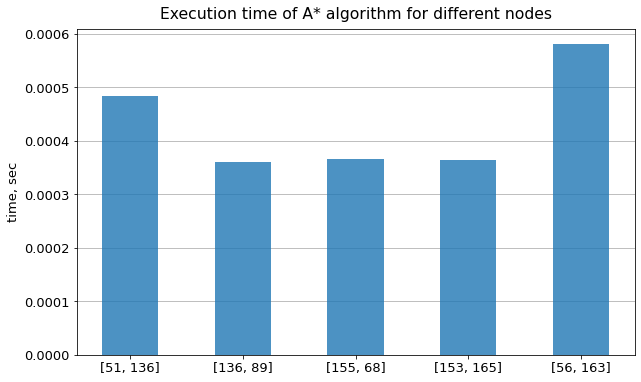

In [16]:
# Vizualization - comparison of the results

mpl.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (10, 6))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 2)
plt.title("Execution time of A* algorithm for different nodes", pad = 10)

xs = range(len(AA_time))
plt.bar([x for x in xs], AA_time, \
        width = 0.5, alpha = 0.8, zorder = 2)

plt.xticks([i for i in xs], nodes_list)

plt.ylabel('time, sec')
plt.show()